In [138]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
#TODO update visualise method for >2 dimensions
#TODO test with >2 dimension input
#TODO connect neurons into ANN

In [139]:
class neuron:
    def __init__(self, af_type, weights=np.array([])):
        self.af_type = af_type
        self.weights = weights

    def activate(self, input):
        return self.activation_function(np.dot(input, self.weights))

    def activation_function(self, a):
        if self.af_type == 'sigmoid':
            return 1/(1+np.exp(-a))
        
    def visualise(self, n=100):
        x = np.linspace(0, 1, n)
        
        aa = np.empty((n, n))
        for i, x1i in enumerate(x):
            for j, x2i in enumerate(x):
                aa[i,j] = self.activate([x1i, x2i])

        fig = plt.figure()
        plt.rcParams['figure.figsize'] = (12,6)
        fig.set_tight_layout(True)

        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122)

        xx1, xx2 = np.meshgrid(x, x)

        ax1.plot_surface(xx1, xx2, aa, cmap=cm.PiYG)
        ax1.scatter(tx[:,0], tx[:,1], ty, color='k')

        ax2.contourf(xx1, xx2, aa, 50, cmap=cm.PiYG)
        ax2.scatter(tx[:,0], tx[:,1], color='k')

        plt.plot()

        return fig, ax1, ax2

In [140]:
class training:
    def __init__(self, l_inputs, l_outputs, training_type):
        self.training_type = training_type
        self.l_inputs = l_inputs
        self.l_outputs = l_outputs
    
    def train(self, neuron_tt, step_size, thresh, max_steps, w_decay=0.01):
        N = np.shape(self.l_inputs)[0]
        N_params = np.shape(self.l_inputs)[1]
        
        if self.training_type == 'mlf':
            weights = np.random.rand(N_params)
            dG = np.ones(N_params)

            steps = 0

            while all(np.abs(dG) > thresh):
                neuron_tt.weights = weights

                outputs = np.array([])
                for l_input in self.l_inputs:
                    output = neuron_tt.activate(l_input)
                    outputs = np.append(outputs, output)

                dG = np.array([])
                for l_input_col in self.l_inputs.T:
                    dG = np.append(dG, -np.sum(np.multiply((self.l_outputs - outputs),l_input_col)))

                weights -= step_size*dG
                steps += 1

                if steps > max_steps:
                    f'Training Failed {dG}'
                    break

        elif self.training_type == 'rmlf':
            weights = np.random.rand(N_params)
            dM = np.ones(N_params)

            steps = 0

            while all(np.abs(dM) > thresh):
                neuron_tt.weights = weights

                outputs = np.array([])
                for l_input in self.l_inputs:
                    output = neuron_tt.activate(l_input)
                    outputs = np.append(outputs, output)

                dM = np.array([])
                for i, l_input_col in enumerate(self.l_inputs.T):
                    dM = np.append(dM, -np.sum(np.multiply((self.l_outputs - outputs),l_input_col) + w_decay*neuron_tt.weights[i]))

                weights -= step_size*dM
                steps += 1

                if steps > max_steps:
                    f'Training Failed {dM}'
                    break
        
            f'{dM}'

        return weights

In [141]:
tx = np.random.rand(10, 2)
ty = np.array([0,0,0,0,0,1,1,1,1,1])

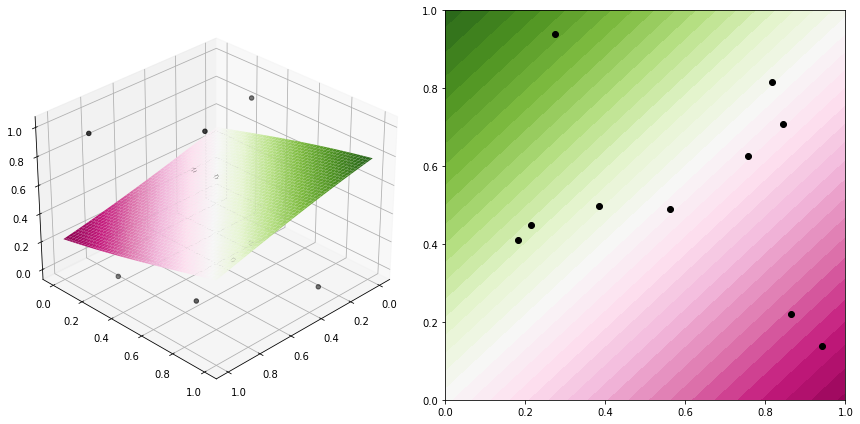

In [142]:
ntt = neuron('sigmoid')
tn = training(tx, ty, 'mlf')
w = tn.train(ntt, 0.01, 0.001, 40000, 0.01)
fig1, ax11, ax12 = ntt.visualise()
ax11.view_init(None, 45)

<ipython-input-139-f76b7d66c9fc>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a))


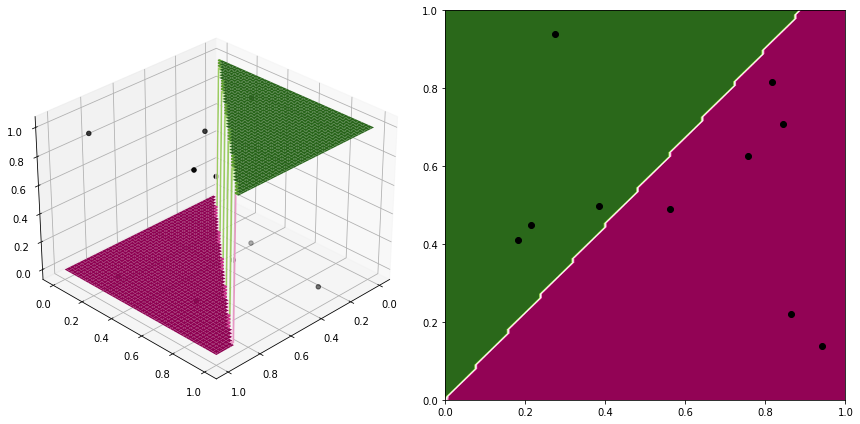

In [143]:
ntt2 = neuron('sigmoid')
tn2 = training(tx, ty, 'rmlf')
w2 = tn2.train(ntt2, 0.01, 0.001, 40000, 0.01)
fig2, ax21, ax22 = ntt2.visualise()
ax21.view_init(None, 45)